In [1]:
import pylab, random
#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10
#set number of examples shown in legends
pylab.rcParams['legend.numpoints'] = 1


In [2]:
def minkowskiDist(v1, v2, p=2):
    """Assumes v1 and v2 are equal-length arrays of numbers
       Returns Minkowski distance of order p between v1 and v2"""
    dist = 0.0
    for i in range(len(v1)):
        dist += abs(v1[i] - v2[i])**p
    return dist**(1/p)

In [3]:
class Animal():
    def __init__(self, name, features):
        """Assumes name a string; features a list of numbers"""
        self.name = name
        self.features = pylab.array(features)
        
    def getName(self):
        return self.name
    
    def getFeatures(self):
        return self.features
    
    def distance(self, other):
        """Assumes other an Animal
           Returns the Euclidean distance between feature vectors
              of self and other"""
        return minkowskiDist(self.getFeatures(),
                             other.getFeatures(), 2)
                             
    def __str__(self):
        return self.name

In [4]:
cobra = Animal('cobra', [1,1,1,1,0])
rattlesnake = Animal('rattlesnake', [1,1,1,1,0])
boa = Animal('boa\nconstrictor', [0,1,0,1,0])
chicken = Animal('chicken', [1,1,0,1,2])
alligator = Animal('alligator', [1,1,0,1,4])
dartFrog = Animal('dart frog', [1,0,1,0,4])
zebra = Animal('zebra', [0,0,0,0,4])
python = Animal('python', [1,1,0,1,0])
guppy = Animal('guppy', [0,1,0,0,0])

In [5]:
animals = [cobra, rattlesnake, boa, chicken, guppy,
          dartFrog, zebra, python, alligator]

In [6]:
def compareAnimals(animals, precision):
    """Assumes animals is a list of animals, precision an int >= 0
       Builds a table of Euclidean distance between each animal"""
    #Get labels for columns and rows
    columnLabels = []
    for a in animals:
        columnLabels.append(a.getName()) # ColumnLabels are Names of animals
    rowLabels = columnLabels[:] # Same with rowLabels
    tableVals = []
    #Get distances between pairs of animals
    #For each row
    for a1 in animals:
        row = []
        #For each column
        for a2 in animals:
            if a1 == a2:
                row.append('--')
            else:
                distance = a1.distance(a2) # Calculate the distance between two animals
                row.append(str(round(distance, precision))) # Append distance to row
        tableVals.append(row)
    #Produce table
    table = pylab.table(rowLabels = rowLabels,
                        colLabels = columnLabels,
                        cellText = tableVals,
                        cellLoc = 'center',
                        loc = 'center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2.5)
    pylab.axis('off')
    pylab.savefig('distances')


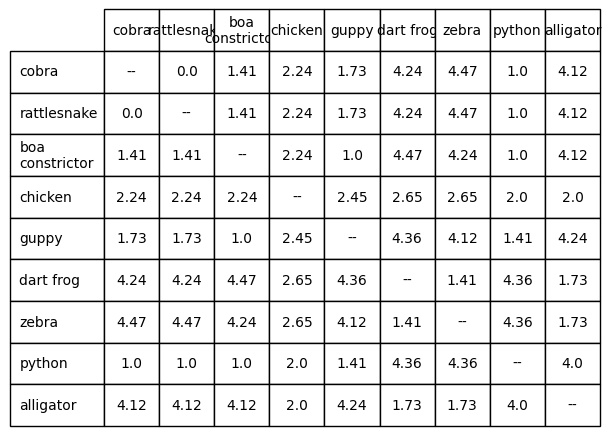

In [7]:
compareAnimals(animals, 2)

In [8]:
class Passenger():
    featureNames = ('C1', 'C2', 'C3', 'age', 'male gender')
    def __init__(self, pClass, age, gender, survived, name):
        self.name = name
        self.featureVec = [0, 0, 0, age, gender]
        """self.featureVec has structure C1,C2,C3, age, gender
        If pClass=C1, then you put pClass=1, and that corresponds to 
        first [1,0,0,age,gender]
        Every variable will be numerical
        Gender will be 1 for Male and 0 for Female
        Survived will be categorical"""
        self.featureVec[pClass - 1] = 1
        self.label = survived
        self.cabinClass = pClass
    def distance(self, other):
        return minkowskiDist(self.featureVec, other.featureVec, 2)
    def getClass(self):
        return self.cabinClass
    def getAge(self):
        return self.featureVec[3]
    def getGender(self):
        return self.featureVec[4]
    def getName(self):
        return self.name
    def getFeatures(self): # Class, age, gender
        return self.featureVec[:]
    def getLabel(self):
        return self.label

In [9]:
def getTitanicData(fname):
    """
    In TitanicPassenger.txt, the order of the columns is 
    class, age, gender, whether the passenger survived, name of passenger
    Everything is comma separated. data is a dictionary
    """
    data = {}
    data['class'], data['survived'], data['age'] = [], [], []
    data['gender'], data['name'] = [], []
    f = open(fname)
    line = f.readline()
    while line != '':
        split = line.split(',')
        data['class'].append(int(split[0]))
        data['age'].append(float(split[1]))
        if split[2] == 'M':
            data['gender'].append(1)
        else:
            data['gender'].append(0)
        if split[3] == '1':
            data['survived'].append('Survived')
        else:
            data['survived'].append('Died')
        data['name'].append(split[4:])
        line = f.readline()
    return data

In [10]:
def buildTitanicExamples(fileName):
    data = getTitanicData(fileName)
    examples = []
    for i in range(len(data['class'])):
        """Create Passenger object with variables from data"""
        p = Passenger(data['class'][i], data['age'][i],
                      data['gender'][i], data['survived'][i],
                      data['name'][i])
        examples.append(p)
    print('Finished processing', len(examples), 'passengers\n')    
    return examples

In [11]:
examples = buildTitanicExamples('TitanicPassengers.txt')

Finished processing 1046 passengers



In [12]:
def findNearest(name, exampleSet):
    for e in exampleSet:
        if e.getName() == name:
            example = e
            break # example will be the name
    curDist = None
    for e in exampleSet:
        if e.getName() != name:
            if curDist == None or\
               example.distance(e) < curDist:
                nearest = e
                curDist = example.distance(nearest)
    return nearest


In [13]:
findNearest('guppy', animals).getName()

'boa\nconstrictor'

If you want to get the label of a guppy and we used nearest neighbord to identify it, then we would get that a guppy is a reptile, which doesn't seem right. Maybe we need more neighbors

# K Nearest Neighbors

In [14]:
def accuracy(truePos, falsePos, trueNeg, falseNeg):
    numerator = truePos + trueNeg
    denominator = truePos + trueNeg + falsePos + falseNeg
    return numerator/denominator

def sensitivity(truePos, falseNeg): # Recall
    try:
        return truePos/(truePos + falseNeg) # Total Actual Positives
    except ZeroDivisionError:
        return float('nan')

def specificity(trueNeg, falsePos): # Precision
    try:
        return trueNeg/(trueNeg + falsePos) # Total Actual Negatives
    except ZeroDivisionError:
        return float('nan')

def posPredVal(truePos, falsePos):
    try:
        return truePos/(truePos + falsePos) # Total Predicted Positives
    except ZeroDivisionError:
        return float('nan')
    
def negPredVal(trueNeg, falseNeg):
    try:
        return trueNeg/(trueNeg + falseNeg) # Total Predicted Negatives
    except ZeroDivisionError:
        return float('nan')
    
def getStats(truePos, falsePos, trueNeg, falseNeg, toPrint = True):
    accur = accuracy(truePos, falsePos, trueNeg, falseNeg)
    sens = sensitivity(truePos, falseNeg)
    spec = specificity(trueNeg, falsePos)
    ppv = posPredVal(truePos, falsePos)
    if toPrint:
        print(' Accuracy =', round(accur, 3))
        print(' Sensitivity =', round(sens, 3))
        print(' Specificity =', round(spec, 3))
        print(' Pos. Pred. Val. =', round(ppv, 3))
    return (accur, sens, spec, ppv)

In [15]:
def findKNearest(example, exampleSet, k):
    kNearest, distances = [], []
    #Build lists containing first k examples and their distances
    for i in range(k):
        kNearest.append(exampleSet[i])
        distances.append(example.distance(exampleSet[i]))
    maxDist = max(distances) #Get maximum distance
    #Look at examples not yet considered
    for e in exampleSet[k:]:
        dist = example.distance(e)
        if dist < maxDist:
            #replace farther neighbor by this one
            maxIndex = distances.index(maxDist) #Index of farthest point
            kNearest[maxIndex] = e # Replace knearest point with new point
            distances[maxIndex] = dist # Replace distance
            maxDist = max(distances)  # Get new farthest distance    
    return kNearest, distances

In [16]:
findKNearest(guppy, animals, 3)

([<__main__.Animal at 0x22acd74b550>,
 [0.0, 1.4142135623730951, 1.0])

In [17]:
def KNearestClassify(training, testSet, label, k):
    """Assumes training & testSet lists of examples, k an int
       Predicts whether each example in testSet has label
       Returns number of true positives, false positives,
          true negatives, and false negatives"""
    truePos, falsePos, trueNeg, falseNeg = 0, 0, 0, 0
    for testCase in testSet:
        nearest, distances = findKNearest(testCase, training, k)
        #conduct vote
        numMatch = 0
        for i in range(len(nearest)):
            if nearest[i].getLabel() == label:
                numMatch += 1 # If label is the same as point's label
        if numMatch > k//2: #guess label
            if testCase.getLabel() == label:
                truePos += 1 # If the label of test = actual label, return truePos
            else:
                falsePos += 1
        else: #guess not label
            if testCase.getLabel() != label:
                trueNeg += 1
            else:
                falseNeg += 1
    return truePos, falsePos, trueNeg, falseNeg

In [18]:
def leaveOneOut(examples, method, toPrint = True):
    truePos, falsePos, trueNeg, falseNeg = 0, 0, 0, 0
    for i in range(len(examples)):
        testCase = examples[i]
        trainingData = examples[0:i] + examples[i+1:] #trainingData is all but i
        results = method(trainingData, [testCase]) # Predict point i using rest of neighbors
        truePos += results[0]
        falsePos += results[1]
        trueNeg += results[2]
        falseNeg += results[3]
    if toPrint:
        getStats(truePos, falsePos, trueNeg, falseNeg)
    return truePos, falsePos, trueNeg, falseNeg

def split80_20(examples):
    sampleIndices = random.sample(range(len(examples)),
                                  len(examples)//5)
    trainingSet, testSet = [], []
    for i in range(len(examples)):
        if i in sampleIndices:
            testSet.append(examples[i])
        else:
            trainingSet.append(examples[i])
    return trainingSet, testSet
    
def randomSplits(examples, method, numSplits, toPrint = True):
    truePos, falsePos, trueNeg, falseNeg = 0, 0, 0, 0
    random.seed(0)
    for t in range(numSplits):
        trainingSet, testSet = split80_20(examples)
        results = method(trainingSet, testSet)
        truePos += results[0]
        falsePos += results[1]
        trueNeg += results[2]
        falseNeg += results[3]
    getStats(truePos/numSplits, falsePos/numSplits,
             trueNeg/numSplits, falseNeg/numSplits, toPrint)
    return truePos/numSplits, falsePos/numSplits,\
             trueNeg/numSplits, falseNeg/numSplits

In [19]:
knn = lambda training, testSet:\
             KNearestClassify(training, testSet,
                              'Survived', 3)

In [20]:
knn(examples[:50], examples[60:61])

(1, 0, 0, 0)

In [21]:
numSplits = 10
print('Average of', numSplits,
     '80/20 splits using KNN (k=3)')
truePos, falsePos, trueNeg, falseNeg =\
     randomSplits(examples, knn, numSplits)

print('Average of LOO testing using KNN (k=3)')
truePos, falsePos, trueNeg, falseNeg =\
     leaveOneOut(examples, knn)

Average of 10 80/20 splits using KNN (k=3)
 Accuracy = 0.766
 Sensitivity = 0.67
 Specificity = 0.836
 Pos. Pred. Val. = 0.747
Average of LOO testing using KNN (k=3)
 Accuracy = 0.769
 Sensitivity = 0.663
 Specificity = 0.842
 Pos. Pred. Val. = 0.743


# Logistic Regression

In [22]:
import sklearn.linear_model

In [23]:
def buildModel(examples, toPrint = True):
    featureVecs, labels = [],[]
    for e in examples:
        featureVecs.append(e.getFeatures())
        labels.append(e.getLabel())
    LogisticRegression = sklearn.linear_model.LogisticRegression
    model = LogisticRegression().fit(featureVecs, labels)
    if toPrint:
        print('model.classes_ =', model.classes_)
        for i in range(len(model.coef_)):
            print('For label', model.classes_[1])
            for j in range(len(model.coef_[0])):
                print('   ', Passenger.featureNames[j], '=',
                      model.coef_[0][j])
    return model

def applyModel(model, testSet, label, prob = 0.5):
    testFeatureVecs = [e.getFeatures() for e in testSet]
    probs = model.predict_proba(testFeatureVecs)
    truePos, falsePos, trueNeg, falseNeg = 0, 0, 0, 0
    for i in range(len(probs)):
        if probs[i][1] > prob: # 0.5 odds
            if testSet[i].getLabel() == label:
                truePos += 1
            else:
                falsePos += 1
        else:
            if testSet[i].getLabel() != label:
                trueNeg += 1
            else:
                falseNeg += 1
    return truePos, falsePos, trueNeg, falseNeg

def lr(trainingData, testData, prob = 0.5):
    model = buildModel(trainingData, False)
    results = applyModel(model, testData, 'Survived', prob)
    getStats(results[0], results[1], results[2], results[3])
    return results

In [24]:
random.seed(300)
trainingSet, testSet = split80_20(examples)
buildModel(trainingSet, True)

model.classes_ = ['Died' 'Survived']
For label Survived
    C1 = 1.1286057408502537
    C2 = -0.04784042910641669
    C3 = -1.0807702909556562
    age = -0.0354352426736661
    male gender = -2.3440093087303246


LogisticRegression()

L2 vs L1: \
L2: each variable gets some weight \
L1: some variables get 0 weight


If you run this without C1 as a variable, you will get a different picture for the variables

In [25]:
trainingSet, testSet = split80_20(examples)
lr(trainingSet, testSet)



 Accuracy = 0.799
 Sensitivity = 0.69
 Specificity = 0.877
 Pos. Pred. Val. = 0.8


(60, 15, 107, 27)

# Changing Probability

In [29]:
random.seed(0)
trainingSet, testSet = split80_20(examples)
model = buildModel(trainingSet, False)
print('Try p = 0.1')
truePos, falsePos, trueNeg, falseNeg =\
                  applyModel(model, testSet, 'Survived', 0.1)
getStats(truePos, falsePos, trueNeg, falseNeg)
print('Try p = 0.9')
truePos, falsePos, trueNeg, falseNeg =\
                  applyModel(model, testSet, 'Survived', 0.9)
getStats(truePos, falsePos, trueNeg, falseNeg)

print()

Try p = 0.1
 Accuracy = 0.493
 Sensitivity = 0.976
 Specificity = 0.161
 Pos. Pred. Val. = 0.444
Try p = 0.9
 Accuracy = 0.66
 Sensitivity = 0.188
 Specificity = 0.984
 Pos. Pred. Val. = 0.889




|       | Predicted +      | Predicted -      |
|---------------|---------------|---------------|
| Actual + | T+ | F- |
| Actual - | F+ | T- |

$$Spec = \frac{T-}{T- (+) F+}$$


p=0.9
|       | Predicted +      | Predicted -      |
|---------------|---------------|---------------|
| Actual + | $\downarrow$ | $\uparrow$ |
| Actual - | $\downarrow$ | $\uparrow$ |

p=0.1
|       | Predicted +      | Predicted -      |
|---------------|---------------|---------------|
| Actual + | $\uparrow$ | $\downarrow$ |
| Actual - | $\uparrow$ | $\downarrow$ |



$$p= 0.9 =>Spec = \frac{T-}{T- (+) F+} = \frac{\uparrow}{\uparrow (+) \downarrow } = \uparrow$$


In [30]:
def buildROC(trainingSet, testSet, title, plot = True):
    model = buildModel(trainingSet, True)
    xVals, yVals = [], []
    p = 0.0
    while p <= 1.0:
        truePos, falsePos, trueNeg, falseNeg =\
                               applyModel(model, testSet,
                               'Survived', p)
        xVals.append(1.0 - specificity(trueNeg, falsePos))
        yVals.append(sensitivity(truePos, falseNeg))
        p += 0.01
    auroc = sklearn.metrics.auc(xVals, yVals)
    if plot:
        pylab.plot(xVals, yVals)
        pylab.plot([0,1], [0,1])
        title = title + '\nAUROC = ' + str(round(auroc,3))
        pylab.title(title)
        pylab.xlabel('1 - specificity')
        pylab.ylabel('Sensitivity')
    return auroc


model.classes_ = ['Died' 'Survived']
For label Survived
    C1 = 1.2863798532205788
    C2 = -0.20877100910635799
    C3 = -1.0779170183575921
    age = -0.039371719499064914
    male gender = -2.304046436959582


0.860056925996205

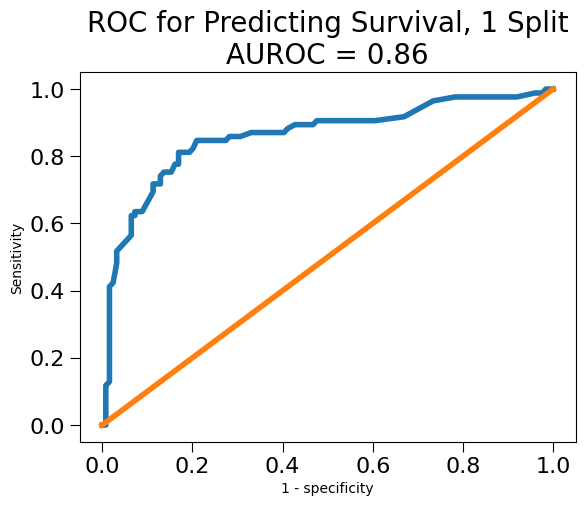

In [31]:
random.seed(0)
trainingSet, testSet = split80_20(examples)
buildROC(trainingSet, testSet, 'ROC for Predicting Survival, 1 Split')

Orange line represents a random classifier